In [126]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=lambda x: pd.DataFrame(x)

In [13]:
oo=np.array([np.random.random_sample() for x in range(64)])

In [15]:
oo=oo.reshape([8,8])

In [16]:
df(oo)

,0,1,2,3,4,5,6,7
0,0.904655,0.304087,0.631058,0.138678,0.186690,0.061129,0.738831,0.396637
1,0.747428,0.328313,0.981546,0.721623,0.492913,0.398311,0.563960,0.952346
2,0.763809,0.940749,0.360764,0.924088,0.320950,0.891723,0.426220,0.912346
3,0.597306,0.207155,0.006331,0.261325,0.153922,0.430493,0.769409,0.370085
4,0.012037,0.809142,0.398057,0.726579,0.393497,0.727628,0.188002,0.683555
5,0.950603,0.720081,0.578948,0.461678,0.985657,0.877783,0.674206,0.896031
6,0.483709,0.228277,0.569796,0.407908,0.646480,0.840842,0.343517,0.521814
7,0.717806,0.496650,0.833043,0.077474,0.641032,0.687724,0.059814,0.810031


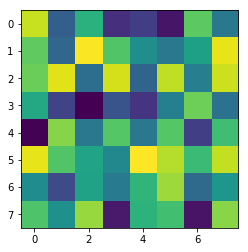

In [17]:
plt.imshow(oo)

In [1]:
import pandas as pd

In [11]:
rr=pd.read_excel('/home/wy/temp/e-loc.xls')

In [15]:
#距离函数
import math
#a:(x,y)
def distance(a,b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

In [23]:
#-全局变量
node=pd.read_csv('/home/wy/temp/node.CSV',header=None)
node={name:(x,y) for i,(name,x,y) in node.iterrows()}

In [47]:
#表示坐标，单位km
node['F16']

(7, 105)

In [44]:
#-全局变量
edge=pd.read_csv('/home/wy/temp/bian.CSV',header=None)
edge=[(f,t) for i,(f,t) in edge.iterrows()]

In [74]:
#表示边对
edge[0]

('F16', 'J27')

In [105]:
#主干道-全局变量
edge_zhu=pd.read_csv('/home/wy/temp/bian-zhu.CSV',header=None)
edge_zhu=[(f,t) for i,(f,t) in edge_zhu.iterrows()]

In [195]:
#非主干道-全局变量
edge_nor=pd.read_csv('/home/wy/temp/bian-nor.CSV',header=None)
edge_nor=[(f,t) for i,(f,t) in edge_nor.iterrows()]

In [196]:
len(edge_nor)+len(edge_zhu)==len(edge)

True

In [78]:
#表示边的距离，单位km，id按edge数组顺序
bianDist={i:(distance(node[e[0]],node[e[1]]),e[0],e[1]) for i,e in enumerate(edge)}

In [79]:
bianDist[0]

(11.40175425099138, 'F16', 'J27')

In [235]:
edgeDist={e[0]+e[1]:(distance(node[e[0]],node[e[1]]),e[0],e[1]) for i,e in enumerate(edge)}

In [237]:
edgeDist

{'D1J09': (32.69556544854363, 'D1', 'J09'),
 'D1J10': (24.20743687382041, 'D1', 'J10'),
 'D1J11': (22.561028345356956, 'D1', 'J11'),
 'D2J02': (40.26164427839479, 'D2', 'J02'),
 'F01J21': (8.602325267042627, 'F01', 'J21'),
 'F02J21': (8.54400374531753, 'F02', 'J21'),
 'F03J21': (8.48528137423857, 'F03', 'J21'),
 'F04J22': (10.295630140987, 'F04', 'J22'),
 'F05J22': (10.295630140987, 'F05', 'J22'),
 'F06J22': (6.324555320336759, 'F06', 'J22'),
 'F07J23': (7.615773105863909, 'F07', 'J23'),
 'F08J24': (11.661903789690601, 'F08', 'J24'),
 'F09J24': (9.219544457292887, 'F09', 'J24'),
 'F10J25': (16.0312195418814, 'F10', 'J25'),
 'F11J25': (14.035668847618199, 'F11', 'J25'),
 'F12J26': (9.848857801796104, 'F12', 'J26'),
 'F13J26': (12.649110640673518, 'F13', 'J26'),
 'F14J27': (13.892443989449804, 'F14', 'J27'),
 'F15J27': (7.615773105863909, 'F15', 'J27'),
 'F16J27': (11.40175425099138, 'F16', 'J27'),
 'F17J27': (10.198039027185569, 'F17', 'J27'),
 'F18J28': (13.038404810405298, 'F18', 'J28

In [80]:
#最大，最小 距离
max([d for d,f,t in bianDist.values()]),min([d for d,f,t in bianDist.values()])

(40.26164427839479, 6.324555320336759)

In [13]:
import networkx as nx

In [106]:
#建立图模型-全局变量
G = nx.Graph()
G.add_nodes_from(list(node.keys()))
G.add_edges_from(edge_nor,{"主干道":False,"容量":1})
G.add_edges_from(edge_zhu,{"主干道":True,"容量":2})

In [256]:
for e in G.edges_iter():
    G.add_edge(e[0],e[1],{'物理距离':distance(node[e[0]],node[e[1]])})

In [197]:
#建立多边图模型
MG = nx.MultiGraph()
MG.add_nodes_from(list(node.keys()))
MG.add_edges_from(edge_nor,{"主干道":False})
MG.add_edges_from(edge_zhu,{"主干道":True})
MG.add_edges_from(edge_zhu,{"主干道":True})

In [199]:
len(G.edges())

174

In [193]:
len(edge_zhu)

18

In [198]:
len(MG.edges())

192

In [114]:
G备份=G.copy()

In [168]:
#导出可视化所需邻接表
s=nx.adjacency_matrix(G备份,G.nodes())
ss=pd.DataFrame(s.toarray(),index=G.nodes(),columns=G.nodes())
ss.to_excel("n2.xls")

In [115]:
#键值对式序列化库V1
PICKLE_PATH='./G备份.pick'
import shelve

def set_pickle(k='temp',v=''):
    with shelve.open(PICKLE_PATH) as file:
        file[k]=v

def get_pickle(k):
    if k is None:
        return False
    with shelve.open(PICKLE_PATH) as file:
        try:
            v=file[k]
        except KeyError:
            return None
        else:
            return v

In [116]:
set_pickle('v1',G备份)

In [182]:
#节点分类-全局变量
D,F,Z,J=[],[],[],[]
for i in G.nodes_iter():
    if i[0]=='D':
        D.append(i)
    if i[0]=='F':
        F.append(i)
    if i[0]=='Z':
        Z.append(i)
    if i[0]=='J':
        J.append(i)

In [119]:
for i in G.nodes_iter():
    if i[0]=='D':
        G.add_node(i,{'类型':'待机'})
    if i[0]=='F':
        G.add_node(i,{'类型':'发射'})
    if i[0]=='Z':
        G.add_node(i,{'类型':'转载'})
    if i[0]=='J':
        G.add_node(i,{'类型':'路口'})

In [200]:
#边属性读取
G.edge['J02']['D2']

{'主干道': False, '容量': 1}

In [213]:
#MG边属性读取
MG.edge['J02']['D2']

{0: {'主干道': False}}

In [201]:
G['F13']

{'J26': {'主干道': False, '容量': 1}}

In [ ]:
#D1,D2需要一个路径表，分情况讨论
#物理距离前几-及对应 F
#结合车类型和道路类型耗时前几-及对应 F

#Z也需要，及对应 F

#从而追加参数 超级短路径(共现于 D-F,F-Z )
#以及 F-Z 这个路径表，存在两个方向的使用。 

In [268]:
#path,变成边组
def pathTuple(path):
    res=[]
    for i in range(len(path)-1):
        a,b=path[i:i+2]
        res.append((a,b))
    return res

In [270]:
pathTuple(v)

[('D2', 'J12'),
 ('J12', 'J13'),
 ('J13', 'J14'),
 ('J14', 'J15'),
 ('J15', 'J16'),
 ('J16', 'J39'),
 ('J39', 'J40'),
 ('J40', 'F38')]

In [245]:
#path,物理距离计算
def pathDistance(path):
    res=[]
    for i in range(len(path)-1):
        a,b=path[i:i+2]
        res.append(edgeDist.get(a+b)[0] if edgeDist.get(a+b,None) else edgeDist.get(b+a)[0])
    return sum(res)

In [263]:
#path,时间计算-全局式的
#car->"A","B","C"
def pathTime(path,car):
    res=[]
    veb=None
    for i in range(len(path)-1):
        a,b=path[i:i+2]
        dis=G.edge[a][b]['物理距离']
        if car == 'A':
            if G.edge[a][b]['主干道']:
                veb=70
            else:
                veb=45
        if car == 'B':
            if G.edge[a][b]['主干道']:
                veb=60
            else:
                veb=35
        if car == 'C':
            if G.edge[a][b]['主干道']:
                veb=50
            else:
                veb=30            
        tim=dis/veb
        res.append(tim)
    return sum(res)

In [232]:
v

['D2', 'J12', 'J13', 'J14', 'J15', 'J16', 'J39', 'J40', 'F38']

In [250]:
pathTime(v,'B')

3.5668569770459766

In [246]:
pathDistance(v)

167.48062919492975

In [251]:
#D-F最短物理路径
#临时性算法优化：all_shortest_paths 迭代器版的最短路径
D_F={}
for d in D:
    D_F[d]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=d,target=f)
        D_F[d][f]=(shorttemp,nx.shortest_path_length(G,source=d,target=f),pathDistance(shorttemp))

In [252]:
D_F

{'D1': {'F01': (['D1',
    'Z03',
    'J52',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J14',
    'J21',
    'F01'],
   9,
   190.45706701858288),
  'F02': (['D1',
    'Z03',
    'J52',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J14',
    'J21',
    'F02'],
   9,
   190.39874549685777),
  'F03': (['D1',
    'Z03',
    'J52',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J14',
    'J21',
    'F03'],
   9,
   190.34002312577883),
  'F04': (['D1',
    'Z03',
    'J52',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J14',
    'J21',
    'J22',
    'F04'],
   10,
   212.5464499468984),
  'F05': (['D1',
    'Z03',
    'J52',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J14',
    'J21',
    'J22',
    'F05'],
   10,
   212.5464499468984),
  'F06': (['D1',
    'Z03',
    'J52',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J14',
    'J21',
    'J22',
    'F06'],
   10,
   208.57537512624816),
  'F07': (['D1',
    'Z03',
    'J52',
    'J07',
    'Z04',
    'J37',
    'J

In [259]:
#D-F权值化后最短 耗时路径 

#先算权
for e in G.edges_iter():
    dist=G.edge[e[0]][e[1]]['物理距离']
    if G.edge[e[0]][e[1]]['主干道']:
        veb=70
    else:
        veb=45
    G.add_edge(e[0],e[1],{'A车耗时':dist/veb})
    
    if G.edge[e[0]][e[1]]['主干道']:
        veb=60
    else:
        veb=35
    G.add_edge(e[0],e[1],{'B车耗时':dist/veb})
    
    if G.edge[e[0]][e[1]]['主干道']:
        veb=50
    else:
        veb=30 
    G.add_edge(e[0],e[1],{'C车耗时':dist/veb})

In [261]:
#A车
#再遍历
A_D_F={}
for d in D:
    A_D_F[d]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=d,target=f,weight="A车耗时")
        A_D_F[d][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'A'))

In [264]:
#B车
#再遍历
B_D_F={}
for d in D:
    B_D_F[d]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=d,target=f,weight="B车耗时")
        B_D_F[d][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'B'))

In [265]:
#C车
#再遍历
C_D_F={}
for d in D:
    C_D_F[d]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=d,target=f,weight="C车耗时")
        C_D_F[d][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'C'))

In [266]:
B_D_F

{'D1': {'F01': (['D1',
    'J09',
    'J08',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J14',
    'J21',
    'F01'],
   10,
   177.166373103571,
   4.182711454882103),
  'F02': (['D1',
    'J09',
    'J08',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J14',
    'J21',
    'F02'],
   10,
   177.1080515818459,
   4.181045125689957),
  'F03': (['D1',
    'J09',
    'J08',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J14',
    'J21',
    'F03'],
   10,
   177.04932921076696,
   4.17936734365913),
  'F04': (['D1',
    'J09',
    'J08',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J25',
    'J23',
    'J22',
    'F04'],
   11,
   181.9264046051067,
   4.7591885454021705),
  'F05': (['D1',
    'J09',
    'J08',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J25',
    'J23',
    'J22',
    'F05'],
   11,
   181.9264046051067,
   4.7591885454021705),
  'F06': (['D1',
    'J09',
    'J08',
    'J07',
    'Z04',
    'J37',
    'J15',
    'J25',
    'J23',
    'J22',
    'F06']

In [343]:
carA

['A01', 'A02', 'A03', 'A04', 'A05']

In [286]:
carA=["A"+str(i).zfill(2) for i in range(1,6)]
carB=["B"+str(i).zfill(2) for i in range(1,6)]
carC=["C"+str(i).zfill(2) for i in range(1,12)]

In [322]:
def alignLaunch(stage1):
    #寻找最慢车
    t=[(car,state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1])) for car,state in st.items()]
    tdic={car:state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1]) for car,state in st.items()}
    tz=max(t, key=lambda item: item[1])
    #计算耗时
    slowCar,slowTime=tz[0],tz[1]
    #每个车与它相减，获得对齐罚时
    for car,state in stage1.items():
        stage1[car]['D-F时序'].loc[-1,'耗时']=slowTime-tdic[car]
    return stage1

In [325]:
def stage1Meeting(stage1):
    #终止计算条件-到达发射点了
    #同时过滤已经到发射点的车
    should,st=[],{}
    for car,state in stage1.items():
        a=state["D-F时序"]["位置"].iloc[state["当前位置"]+1]
        b=state["发射点"]
        if a!=b:
            should.append(car) 
    if len(should)==0:
        return stage1
    else:
    #装填过滤的车
        for i in should:
            st[i]=stage1[i]
    
    #耗时计算
    t=[(car,state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1])) for car,state in st.items()]
    tdic={car:state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1]) for car,state in st.items()}
    
    #t=sorted(t, key=lambda item: item[1])
    #fastCar,fastTime=t[0][0],t[0][1]
    tz=min(t, key=lambda item: item[1])
    fastCar,fastTime=tz[0],tz[1]
    
    #时间线比较
    tt=st[fastCar]["D-F时序"].iloc[st[fastCar]['当前位置']+2]
    if tt['类型'] != 'edge':
        print("出错了：001")
        return stage1
    ttt=tt["位置"]
    roadSize=G.edge[ttt[0]][ttt[1]]['容量']
    #时间线比较-之重叠
    meetingCars=[]
    for car,state in st.items():
        loc=state["D-F时序"]['位置'].iloc[state["当前位置"]]
        if set(ttt)==set(loc):
            meetingCars.append(car)
    if len(meetingCars)>=roadSize:
        #说明需要会车等待
        if len(meetingCars)>roadSize:
            print("出错了：002")
            return stage1
        #To-do 会车等待决策+1
        waitTime = min([tdic[i] for i in meetingCars]) - fastTime
        #写入等待时间
        stage1[fastCar]["D-F时序"].loc[stage1[fastCar]['当前位置']+1,'耗时']=waitTime
    stage1[fastCar]['当前位置']=stage1[fastCar]['当前位置']+2
    
    return stage1Meeting(stage1)    

In [290]:
#D-F时序-生成
#car 表示ABC车型
def generDF(path,car):
    res=[]
    pathT=pathTuple(path)
    for i in range(len(pathT)):
        res.append(path[i])
        res.append(pathT[i])
    res.append(path[-1])
    return pd.DataFrame({"位置":res,
                         "耗时":[G.edge[i[0]][i[1]][car+'车耗时']*60 if type(i) is tuple else 0 for i in res],
                         "类型":["node" if type(i) is str else "edge" for i in res]
                        })

In [323]:
'''
目前权值是以小时为单位的，所以最终结果需要转为分钟 即 * 60  
d_f:表示所有24辆车的路径
{车号:path}
departure:表示每辆车的发车时间，出发时刻，分钟为单位
{车号:时刻}
'''
#波次1的耗时计算
def stage1Consum(d_f,departure):
    stage1={}
    for car,path in d_f.items():
        stage1[car]={
            "车型":car[0],
            "D-F时序":generDF(path,car[0]),
            "发射点":path[-1],
            "出发时刻":departure[car],
            "当前位置":1
        }
    #To-do:发车次序纠错
    #重叠计算
    newst1=stage1Meeting(stage1)#此处为范式，由于是可变式，所以newst1还是和原来的引用一样
    #齐射罚时
    newst1=alignLaunch(newst1)
    
    return newst1

In [327]:
#car 表示ABC车型
def generFZ(path,car):
    res=[]
    pathT=pathTuple(path)
    for i in range(len(pathT)):
        res.append(path[i])
        res.append(pathT[i])
    res.append(path[-1])
    return pd.DataFrame({"位置":res,
                         "耗时":[G.edge[i[0]][i[1]][car+'车耗时']*60 if type(i) is tuple else 0 for i in res],
                         "类型":["node" if type(i) is str else "edge" for i in res]
                        })

In [328]:
#car 表示ABC车型
def generZF(path,car):
    res=[]
    pathT=pathTuple(path)
    for i in range(len(pathT)):
        res.append(path[i])
        res.append(pathT[i])
    res.append(path[-1])
    return pd.DataFrame({"位置":res,
                         "耗时":[G.edge[i[0]][i[1]][car+'车耗时']*60 if type(i) is tuple else 0 for i in res],
                         "类型":["node" if type(i) is str else "edge" for i in res]
                        })

In [337]:
def stage2Meeting(stage2):
    #终止条件-齐射
    should,st=[],{}
    for car,state in stage2.items():
        a=state["Z-F时序"]["位置"].iloc[state["当前Z-F位置"]+1]
        b=state["发射点"]
        if a!=b:
            should.append(car) 
    if len(should)==0:
        return stage2
    
    #过滤到达终点的
    #装填过滤的车
    for i in should:
        st[i]=stage1[i]
    
    #重叠检测
    #耗时计算
    t,tdic=[],{}
    for car,state in st.items():
        if state["转载完成"]:
            h=sum(state["Z-F时序"]['耗时'].iloc[1:state["当前Z-F位置"]+1])+sum(state["F-Z时序"]['耗时'].iloc[1:state["当前F-Z位置"]+1])
        else:
            h=sum(state["F-Z时序"]['耗时'].iloc[1:state["当前F-Z位置"]+1])
        t.append((car,h))
        tdic[car]=h
            
    #t=sorted(t, key=lambda item: item[1])
    #fastCar,fastTime=t[0][0],t[0][1]
    tz=min(t, key=lambda item: item[1])
    fastCar,fastTime=tz[0],tz[1]
    
    #时间线比较
    if st[fastCar]["转载完成"]:
        tt=st[fastCar]["Z-F时序"].iloc[st[fastCar]['当前Z-F位置']+2]
        if tt['类型'] != 'edge':
            print("出错了：003")
            return stage2
        ttt=tt["位置"]
        roadSize=G.edge[ttt[0]][ttt[1]]['容量']
        #时间线比较-之重叠
        meetingCars=[]
        for car,state in st.items():
            if state["转载完成"]:
                loc=state["Z-F时序"]['位置'].iloc[state["当前Z-F位置"]]
            else:
                loc=state["F-Z时序"]['位置'].iloc[state["当前F-Z位置"]]
            if set(ttt)==set(loc):
                meetingCars.append(car)
        if len(meetingCars)>=roadSize:
            #说明需要会车等待
            if len(meetingCars)>roadSize:
                print("出错了：004")
                return stage2
            #To-do 会车等待决策+1
            waitTime = min([tdic[i] for i in meetingCars]) - fastTime
            #写入等待时间
            stage2[fastCar]["Z-F时序"].loc[stage2[fastCar]['当前Z-F位置']+1,'耗时']=waitTime
        stage2[fastCar]['当前Z-F位置']=stage2[fastCar]['当前Z-F位置']+2
    else:
        tt=st[fastCar]["F-Z时序"].iloc[st[fastCar]['当前F-Z位置']+2]
        if tt['类型'] != 'edge':
            print("出错了：005")
            return stage2
        ttt=tt["位置"]
        roadSize=G.edge[ttt[0]][ttt[1]]['容量']
        #时间线比较-之重叠
        meetingCars=[]
        for car,state in st.items():
            if state["转载完成"]:
                loc=state["Z-F时序"]['位置'].iloc[state["当前Z-F位置"]]
            else:
                loc=state["F-Z时序"]['位置'].iloc[state["当前F-Z位置"]]
            if set(ttt)==set(loc):
                meetingCars.append(car)
        if len(meetingCars)>=roadSize:
            #说明需要会车等待
            if len(meetingCars)>roadSize:
                print("出错了：006")
                return stage2
            #To-do 会车等待决策+1
            waitTime = min([tdic[i] for i in meetingCars]) - fastTime
            #写入等待时间
            stage2[fastCar]["F-Z时序"].loc[stage2[fastCar]['当前F-Z位置']+1,'耗时']=waitTime
        #时间线比较-之转载爆仓
        zt=st[fastCar]["F-Z时序"].iloc[st[fastCar]['当前F-Z位置']+3]
        if zt['类型'] != 'node':
            print("出错了：007")
            return stage2
        if zt['位置'] == st[fastCar]['转载点']:
            #检测是否爆仓
            #所有是这个转载点的车
            #且到过转载点的
            stz=[car for car,state in stage2.items() if state["转载完成"] and state['转载点']==zt['位置']]
            ztTime=sum(st[fastCar]["F-Z时序"]['耗时'].iloc[1:st[fastCar]['当前F-Z位置']+2])
            #计算其是否在区间时间范围内
            stzz,mtz=[],[]
            for car in stz:
                a=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:-1])
                b=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:])
                if a <= ztTime and ztTime < b:
                    mtz.append(b)
                    stzz.append(car)
            #基础转载时间
            zz=10
            if len(stzz) >= 2:
                if len(stzz) > 2:
                    print("报错：特殊")
                #说明爆仓
                waitt=min(mtz)-ztTime
                stage2[fastCar]["F-Z时序"].loc[stage2[fastCar]['当前F-Z位置']+1,'耗时']=waitt
                #计算新的到达时间
                ztt=sum(st[fastCar]["F-Z时序"]['耗时'].iloc[1:st[fastCar]['当前F-Z位置']+2])
                zz+=max(mtz)-ztt
            #未爆仓，进场计算转载耗时
            if len(stzz) ==1:
                #表示存在正在转载物
                zz+=sum(stage2[stzz[0]]["F-Z时序"]['耗时'].iloc[1:])-ztTime
            #并写入转载完成和位置，转载时间
            stage2[fastCar]['转载完成']=True
            stage2[fastCar]['当前F-Z位置']=stage2[fastCar]['当前F-Z位置']+3
            stage2[fastCar]["F-Z时序"].loc[stage2[fastCar]['当前F-Z位置'],'耗时']=zz
        stage2[fastCar]['当前F-Z位置']=stage2[fastCar]['当前F-Z位置']+2

    return stage2Meeting(stage2)
    

In [338]:
def alignLaunch2(stage2):
    #寻找最慢车
    t,tdic=[],{}
    for car,state in st.items():
        h=sum(state["Z-F时序"]['耗时'].iloc[1:state["当前Z-F位置"]+1])+sum(state["F-Z时序"]['耗时'].iloc[1:state["当前F-Z位置"]+1])
        t.append((car,h))
        tdic[car]=h
    tz=max(t, key=lambda item: item[1])
    #计算耗时
    slowCar,slowTime=tz[0],tz[1]
    #每个车与它相减，获得对齐罚时
    for car,state in stage2.items():
        stage2[car]['Z-F时序'].loc[-1,'耗时']=slowTime-tdic[car]
    return stage2

In [339]:
'''
f_z:{车号:path}
z_f:{车号:path}
'''
def stage2Consum(f_z,z_f):
    stage2={}
    for car in f_z.keys():
        stage2[car]={
            "车型":car[0],
            "F-Z时序":generFZ(f_z[car],car[0]),
            "当前F-Z位置":1,
            "转载点":f_z[car][-1],
            "转载完成":False,
            "Z-F时序":generZF(z_f[car],car[0]),
            "当前Z-F位置":1,
            "发射点":z_f[car][-1]
        }
    #重叠计算-转载计算-转载爆仓问题？->中断所有到此 Z 的车辆
    newst2=stage2Meeting(stage2)#此处为范式，由于是可变式，所以newst1还是和原来的引用一样
    #齐射罚时
    newst2=alignLaunch2(newst2)
    
    return newst2

In [342]:
def allConsum(departure,d_f,f_z,z_f):
    stage1=stage1Consum(d_f,departure)
    stage2=stage2Consum(f_z,z_f)
    #计算总暴露时间(排除转载时间)
    allTime={car:state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:]) for car,state in stage1.items()}
    for car,state in stage2.items():
        allTime[car]+=sum(state["Z-F时序"]['耗时'].iloc[1:-1])+sum(state["F-Z时序"]['耗时'].iloc[1:])
    
    res=sum([time for time in allTime.values()])
    
    return res,stage1,stage2

In [ ]:
#
departure,d_f,f_z,z_f={},{},{},{}
targetTime,stage1,stage2=allConsum(departure,d_f,f_z,z_f)

In [318]:
vv=generDF(v,'A')

In [319]:
vv.loc[2,'耗时']=8

In [320]:
vv

,位置,类型,耗时
0,D2,node,0.000000
1,"(D2, J12)",edge,32.468788
2,J12,node,8.000000
3,"(J12, J13)",edge,19.991835
4,J13,node,0.000000
5,"(J13, J14)",edge,14.058188
6,J14,node,0.000000
7,"(J14, J15)",edge,31.714286
8,J15,node,0.000000
9,"(J15, J16)",edge,21.953569


In [305]:
vv.iloc[1]['类型']

'edge'